## Fashion MNIST dataset classification
This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:
### Label	Description
* 0-->	T-shirt/top
* 1-->	Trouser
* 2-->	Pullover
* 3-->	Dress
* 4-->	Coat
* 5-->	Sandal
* 6-->	Shirt
* 7-->	Sneaker
* 8-->	Bag
* 9-->	Ankle boot

##  Fshion MNIST Image Recognition Section

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist,fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
np.random.seed(0)


4423680/4422102 [==============================] - 0s 0us/step


### Get the data 

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


### assertion for:
* "The number of images is not equal to the number of labels."
* "The number of images is not equal to the number of labels."
* "The dimensions of the images are not 28x28"
* "The dimensions of the images are not 28x28"

In [3]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

## Plotting the data 

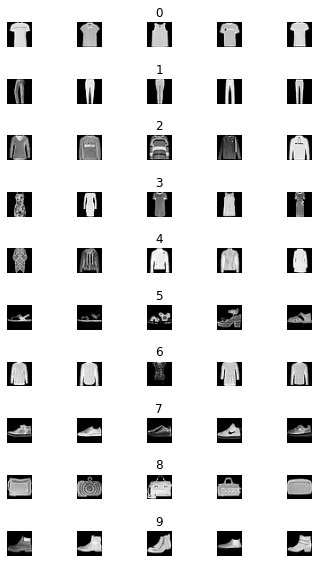

In [4]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))



## Distribution of the training dataset

[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]


Text(0, 0.5, 'Number of images')

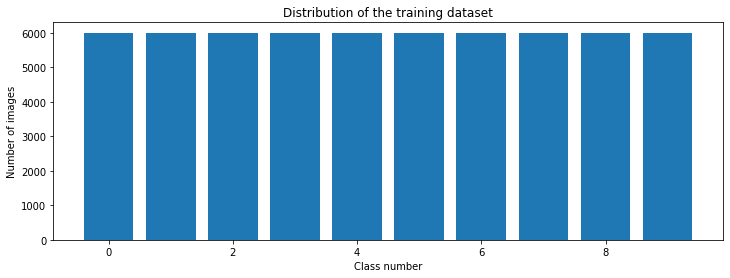

In [5]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

### Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255 
X_test = X_test/255

## Create the model

In [7]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Print he summary of the model 

In [8]:
model = create_model()
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 17,634
Trainable params: 17,634
Non-trainable params: 0
____________________________________________________

## Train the model

In [9]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 20, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/20
270/270 [==============================] - 1s 3ms/step - loss: 0.8249 - accuracy: 0.6703 - val_loss: 0.6453 - val_accuracy: 0.7608
Epoch 2/20
270/270 [==============================] - 1s 3ms/step - loss: 0.5561 - accuracy: 0.7968 - val_loss: 0.5520 - val_accuracy: 0.7900
Epoch 3/20
270/270 [==============================] - 1s 3ms/step - loss: 0.5096 - accuracy: 0.8196 - val_loss: 0.5003 - val_accuracy: 0.8248
Epoch 4/20
270/270 [==============================] - 1s 3ms/step - loss: 0.4763 - accuracy: 0.8323 - val_loss: 0.4911 - val_accuracy: 0.8323
Epoch 5/20
270/270 [==============================] - 1s 3ms/step - loss: 0.4628 - accuracy: 0.8352 - val_loss: 0.4479 - val_accuracy: 0.8368
Epoch 6/20
270/270 [==============================] - 1s 3ms/step - loss: 0.4457 - accuracy: 0.8428 - val_loss: 0.4548 - val_accuracy: 0.8418
Epoch 7/20
270/270 [==============================] - 1s 3ms/step - loss: 0.4292 - accuracy: 0.8481 - val_loss: 0.4605 - val_accuracy: 0.8407
Epoch 

## Plot the history of the model 
to see the accuracy and the loss for the training and validation data set

<class 'list'>
Test score: 0.4564531743526459
Test accuracy: 0.8478000164031982


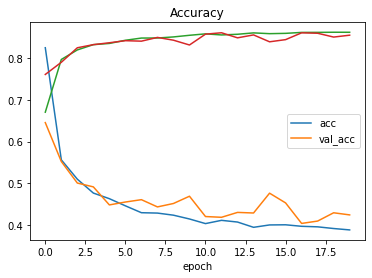

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

## Test the model 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predicted digit: [9]


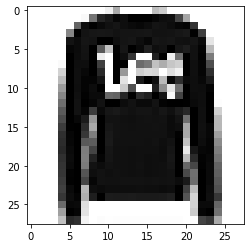

In [12]:
## import the liberaries 
import requests
from PIL import Image
import cv2


### mount Google Drive files by running the following code
from google.colab import drive
drive.mount('/content/drive')

url = '/content/drive/My Drive/Python-Examples-Prof. salwani/7. ANN /sample_image.png'
img = Image.open(url)
plt.imshow(img, cmap=plt.get_cmap('gray'))



img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

img = img/255
img = img.reshape(1, 784)

prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))


As we can see, our model could not predict the new image, 
we may try to deepen the layer, to see if we are able to improve the accuracy and gain the correct results in the predictation phase.

